In [91]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [92]:
company_revenue = pd.read_csv('revenue-prediction.csv',index_col=0)

In [93]:
company_revenue.head(20)

,company_rev,total_salaries,entry_level_count,mid_level_count,employees_count,top_by_mid_count,mid_by_entry_count,avg_salary,avg_rating,rating_admin,rating_analytics,rating_it
Year,,,,,,,,,,,,
2005,6375000,1325019,17,0,17,0.000000,0.000000,77942.29412,3.69,3.69,3.67,3.71
2006,17160000,4153611,50,2,52,0.000000,0.040000,79877.13462,3.74,3.59,3.61,3.84
2007,35006000,7431446,87,5,92,0.000000,0.057471,80776.58696,3.70,3.42,3.76,3.70
2008,61124000,12618904,136,11,148,0.090909,0.080882,85262.86486,3.72,3.84,3.67,3.73
2009,100230000,21956995,238,16,257,0.187500,0.067227,85435.77821,3.72,3.56,3.76,3.71
2010,157440000,35801222,324,49,384,0.224490,0.151235,93232.34896,3.76,3.73,3.80,3.75
2011,215460000,56813089,437,112,567,0.160714,0.256293,100199.45150,3.75,3.68,3.84,3.72
2012,257145000,68567065,492,132,651,0.204545,0.268293,105325.75270,3.71,3.66,3.76,3.70
2013,325384000,75558394,548,134,712,0.223881,0.244526,106121.33990,3.75,3.72,3.79,3.73


In [94]:
company_revenue.fillna(0, inplace=True)

In [95]:
data1 = company_revenue.drop('company_rev', axis=1)
X = company_revenue.drop('company_rev', axis=1).values
Y = company_revenue['company_rev'].values

In [96]:
X2 = sm.add_constant(data1)
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary2())

                                  Results: Ordinary least squares
Model:                         OLS                         Adj. R-squared:                0.987     
Dependent Variable:            y                           AIC:                           544.7955  
Date:                          2019-06-18 12:08            BIC:                           553.2921  
No. Observations:              15                          Log-Likelihood:                -260.40   
Df Model:                      11                          F-statistic:                   98.71     
Df Residuals:                  3                           Prob (F-statistic):            0.00149   
R-squared:                     0.997                       Scale:                         3.5081e+14
----------------------------------------------------------------------------------------------------
                        Coef.           Std.Err.       t    P>|t|        [0.025           0.975]    
-------------------------

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=32)

In [98]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
reg.intercept_

-306276162.0194278

In [100]:
coeff_df = pd.DataFrame(reg.coef_, data1.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
total_salaries,1.545210e+01
entry_level_count,8.277422e+06
mid_level_count,7.002112e+06
employees_count,-8.505503e+06
top_by_mid_count,2.720613e+08
mid_by_entry_count,3.873628e+08
avg_salary,-1.045647e+04
avg_rating,4.794330e+07
rating_admin,1.686847e+08
rating_analytics,-3.783059e+08


In [101]:
Y_predicted_train = reg.predict(X_train)

In [102]:
Y_predicted = reg.predict(X_test)

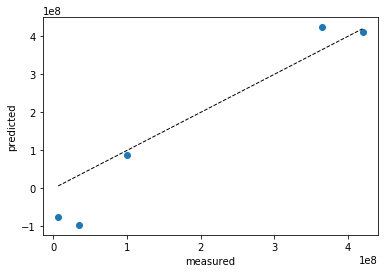

In [103]:
fig, ax = plt.subplots()
ax.scatter(Y_test, Y_predicted)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=1)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [109]:
from sklearn.model_selection import cross_val_score

In [114]:
cv_results = cross_val_score(reg, X, Y, cv=4)
print(cv_results)

[-5.60801721e+03 -8.56927885e+00 -4.34575706e-01 -1.19056997e+07]


In [115]:
np.mean(cv_results)

-2977829.1739949933

In [107]:
from sklearn import metrics
print('Mean Absolute Error of train data:', metrics.mean_absolute_error(Y_train, Y_predicted_train))  
print('Mean Squared Error of train data:', metrics.mean_squared_error(Y_train, Y_predicted_train))  
print('Root Mean Squared Error of train data:', np.sqrt(metrics.mean_squared_error(Y_train, Y_predicted_train)))

Mean Absolute Error of train data: 3.113746643066406e-05
Mean Squared Error of train data: 1.566687046761217e-09
Root Mean Squared Error of train data: 3.95813977363258e-05


In [108]:
from sklearn import metrics
print('Mean Absolute Error of test data:', metrics.mean_absolute_error(Y_test, Y_predicted))  
print('Mean Squared Error of test data:', metrics.mean_squared_error(Y_test, Y_predicted))  
print('Root Mean Squared Error of test data:', np.sqrt(metrics.mean_squared_error(Y_test, Y_predicted)))

Mean Absolute Error of test data: 58834145.69425459
Mean Squared Error of test data: 5546249139892141.0
Root Mean Squared Error of test data: 74473143.74922104
